# Sentiment Analysis with Hugging Face

Hugging Face is an open-source and platform provider of machine learning technologies. You can use install their package to access some interesting pre-built models to use them directly or to fine-tune (retrain it on your dataset leveraging the prior knowledge coming with the first training), then host your trained models on the platform, so that you may use them later on other devices and apps.

Please, [go to the website and sign-in](https://huggingface.co/) to access all the features of the platform.

[Read more about Text classification with Hugging Face](https://huggingface.co/tasks/text-classification)

The Hugging face models are Deep Learning based, so will need a lot of computational GPU power to train them. Please use [Colab](https://colab.research.google.com/) to do it, or your other GPU cloud provider, or a local machine having NVIDIA GPU.

## Application of Hugging Face Text classification model Fune-tuning

Find below a simple example, with just `3 epochs of fine-tuning`.

Read more about the fine-tuning concept : [here](https://deeplizard.com/learn/video/5T-iXNNiwIs#:~:text=Fine%2Dtuning%20is%20a%20way,perform%20a%20second%20similar%20task.)

# Variable definition:

tweet_id: Unique identifier of the tweet
safe_tweet: Text contained in the tweet. Some sensitive information has been removed like usernames and urls
label: Sentiment of the tweet (-1 for negative, 0 for neutral, 1 for positive)
agreement: The tweets were labeled by three people. Agreement indicates the percentage of the three reviewers that agreed on the given label. You may use this column in your training, but agreement data will not be shared for the test set.

In [61]:
pip install nfx


In [62]:
pip install neattext


In [63]:
pip install datasets


In [64]:
import os
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
#Visualization Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# To extract hashtags
import neattext.functions as nfx
import re


In [65]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [66]:
# Load the dataset and display some values
Link = 'https://raw.githubusercontent.com/Newton23-nk/Covid_Vaccine_Sentiment_Analysis/main/Datasets/Train.csv'
df = pd.read_csv(Link)

# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]


# Exploratory Data Analysis

In [67]:
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [68]:
# We look at the number of positive, negative and neutral reviews
df.label.value_counts()

 0.0    4908
 1.0    4053
-1.0    1038
Name: label, dtype: int64

In [69]:
# The count of the agrremtns
df.agreement.value_counts()

1.000000    5866
0.666667    3894
0.333333     239
Name: agreement, dtype: int64

In [70]:
# Legnth of the reviews
review_legnth = df.safe_text.str.len()


In [71]:
# Legnth of the longest review
max(review_legnth)

153

In [72]:
#Legnth of the shortest review
min(review_legnth)

3

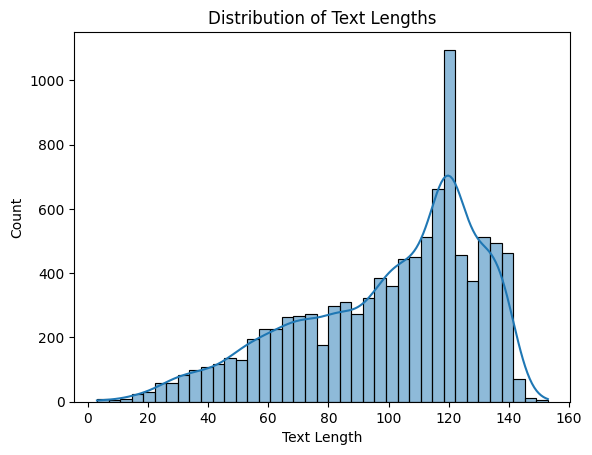

In [73]:
# Length of Tweets
text_length = df['safe_text'].apply(len)
sns.histplot(text_length, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

The highest text length observed is 153 characters, while the minimum text length is 3 characters.

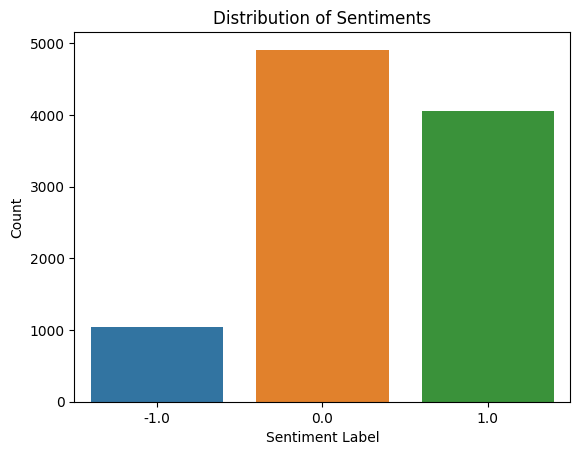

In [74]:
# Distribution of Sentiments
sns.countplot(x='label', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

The distribution of sentiments in the dataset, as depicted by the count plot, shows the prevalence of different sentiment labels within the Twitter posts related to COVID-19 vaccinations.
* Sentiment Label 0 (Neutral):
The sentiment label "0" (neutral) has the highest count, with approximately 5000 instances. This suggests that a significant portion of the collected tweets exhibit a neutral sentiment when it comes to discussing COVID-19 vaccinations. Neutral sentiments often indicate that the tweets may not strongly express positive or negative opinions but rather present factual information or observations.

* Sentiment Label 1 (Positive):
The sentiment label "1" (positive) follows with around 4000 instances. This indicates that a substantial number of tweets show a positive sentiment towards COVID-19 vaccinations. These tweets might express support for vaccinations, share positive experiences, or provide information about vaccination availability and benefits.

* Sentiment Label -1 (Negative):
The sentiment label "-1" (negative) has the lowest count, with approximately 1000 instances. This suggests that a relatively smaller portion of the collected tweets exhibit a negative sentiment towards COVID-19 vaccinations. Negative sentiments can encompass concerns, skepticism, or criticism about the vaccines, their safety, or potential side effects.

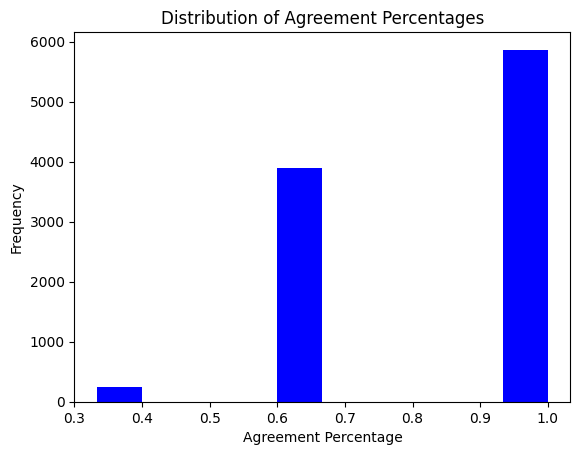

In [75]:
# Distribution of Agreement Percentages
plt.hist(df['agreement'], color='blue')
plt.title('Distribution of Agreement Percentages')
plt.xlabel('Agreement Percentage')
plt.ylabel('Frequency')
plt.show()

* From the distribution plot, it is clear that the majority of tweets have an agreement percentage of 1.000000 (100% agreement among reviewers).
This means that for a significant portion of tweets, all three reviewers assigned the same sentiment label without disagreement.
* For a substantial number of tweets, two out of three reviewers agreed on the assigned sentiment label with a count of 3894.
* Finally, a smaller number of tweets have an agreement percentage of 0.333333, indicating that only one out of three reviewers agreed on the label.

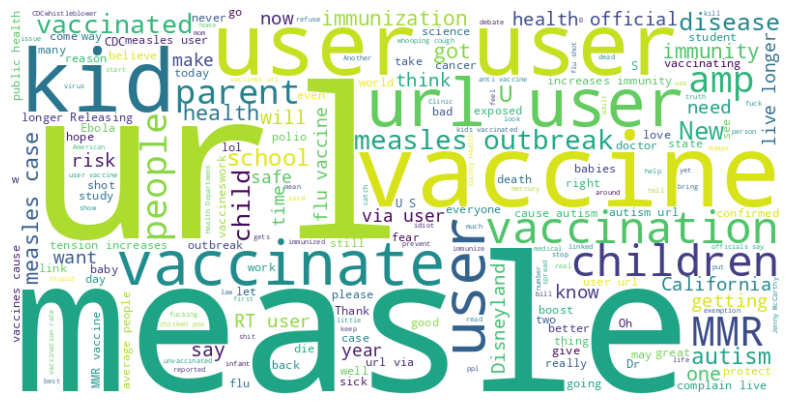

In [76]:
# Concatenate all text from the 'safe_text' column into a single string
text = ' '.join(df['safe_text'])

# Generate the word cloud with a white background
cloud_two_cities = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()


* The high frequency of "vaccine" and "vaccinate" aligns with the overarching theme of COVID-19 vaccinations. Neutral sentiment tweets may contain factual information, discussions, or updates related to the vaccines, contributing to a neutral tone.
* The term "measles" appearing prominently suggests that discussions within the neutral sentiment category often include references to the measles virus. It's possible that some tweets are drawing comparisons or discussing related topics in the context of COVID-19 vaccinations.
* The appearance of "kid" and "children" indicates that discussions involving younger individuals, possibly in the context of vaccination decisions for children, are present within the neutral sentiment tweets.

# Data Cleaning

In [77]:
# Checking for missing values
df.isna().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [78]:
df.duplicated().sum()

0

We will extract hashtags and which can also used for analysis like which was the common aside from #Covid #Vaccine

In [79]:
# get hashtags
df['extract_hashtags'] = df['safe_text'].apply(nfx.extract_hashtags)
df[['extract_hashtags','safe_text']]

,extract_hashtags,safe_text
0,"[#MEANBOY, #MB, #MBS, #MMR, #STEGMANLIFE]",Me &amp; The Big Homie meanboy3000 #MEANBOY #M...
1,[],I'm 100% thinking of devoting my career to pro...
2,[#whatcausesautism],"#whatcausesautism VACCINES, DO NOT VACCINATE Y..."
3,[],I mean if they immunize my kid with something ...
4,"[#jennifair, #mmr…]",Thanks to <user> Catch me performing at La Nui...
...,...,...
9996,[#vaccineswork],Living in a time where the sperm I used to was...
9997,[],<user> <user> In spite of all measles outbrea...
9998,[],Interesting trends in child immunization in Ok...
9999,[],CDC Says Measles Are At Highest Levels In Deca...


In [80]:
# remove hashtags from the column and save the cleaned text to clean text column
df['clean_text'] = df['safe_text'].apply(nfx.remove_hashtags)

# preview
df[['safe_text','clean_text']].head(10)

,safe_text,clean_text
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,Me &amp; The Big Homie meanboy3000 @...
1,I'm 100% thinking of devoting my career to pro...,I'm 100% thinking of devoting my career to pro...
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...","VACCINES, DO NOT VACCINATE YOUR CHILD"
3,I mean if they immunize my kid with something ...,I mean if they immunize my kid with something ...
4,Thanks to <user> Catch me performing at La Nui...,Thanks to <user> Catch me performing at La Nui...
5,<user> a nearly 67 year old study when mental ...,<user> a nearly 67 year old study when mental ...
6,"Study of more than 95,000 kids finds no link b...","Study of more than 95,000 kids finds no link b..."
7,psa: VACCINATE YOUR FUCKING KIDS,psa: VACCINATE YOUR FUCKING KIDS
8,Coughing extra on the shuttle and everyone thi...,Coughing extra on the shuttle and everyone thi...
9,AIDS vaccine created at Oregon Health &amp; Sc...,AIDS vaccine created at Oregon Health &amp; Sc...


We will remove the user handles and the "RT" retweet indicator using the nfx.remove_userhandles in the nfx library.

In [81]:
# remove RT and user handles
def removeRT(text):
    return text.replace("RT" , "")
df['clean_text'] = df['clean_text'].apply(lambda x: nfx.remove_userhandles(x))
df['clean_text'] = df['clean_text'].apply(removeRT)
#Preview of the safe text and clean text
df[['safe_text','clean_text']].head(10)


,safe_text,clean_text
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,Me &amp; The Big Homie meanboy3000 @...
1,I'm 100% thinking of devoting my career to pro...,I'm 100% thinking of devoting my career to pro...
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...","VACCINES, DO NOT VACCINATE YOUR CHILD"
3,I mean if they immunize my kid with something ...,I mean if they immunize my kid with something ...
4,Thanks to <user> Catch me performing at La Nui...,Thanks to <user> Catch me performing at La Nui...
5,<user> a nearly 67 year old study when mental ...,<user> a nearly 67 year old study when mental ...
6,"Study of more than 95,000 kids finds no link b...","Study of more than 95,000 kids finds no link b..."
7,psa: VACCINATE YOUR FUCKING KIDS,psa: VACCINATE YOUR FUCKING KIDS
8,Coughing extra on the shuttle and everyone thi...,Coughing extra on the shuttle and everyone thi...
9,AIDS vaccine created at Oregon Health &amp; Sc...,AIDS vaccine created at Oregon Health &amp; Sc...


We then remove multiple spaces and strip any leading or trailing spaces using the nfx.remove_multiple_spaces function and a custom function stripSpace.

In [82]:
# remove multiple white spaces
def stripSpace(text):
    return text.strip()
df['clean_text'] = df['clean_text'].apply(nfx.remove_multiple_spaces)
df['clean_text'] = df['clean_text'].apply(stripSpace)

To further reduce noise in the data and to remove irrelevant content, we will remove URLs from the data

In [83]:
# remove all urls
df['clean_text'] = df['clean_text'].apply(nfx.remove_urls)

df[['safe_text','clean_text']].head(10)

,safe_text,clean_text
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,Me &amp; The Big Homie meanboy3000 @ Stegman S...
1,I'm 100% thinking of devoting my career to pro...,I'm 100% thinking of devoting my career to pro...
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...","VACCINES, DO NOT VACCINATE YOUR CHILD"
3,I mean if they immunize my kid with something ...,I mean if they immunize my kid with something ...
4,Thanks to <user> Catch me performing at La Nui...,Thanks to <user> Catch me performing at La Nui...
5,<user> a nearly 67 year old study when mental ...,<user> a nearly 67 year old study when mental ...
6,"Study of more than 95,000 kids finds no link b...","Study of more than 95,000 kids finds no link b..."
7,psa: VACCINATE YOUR FUCKING KIDS,psa: VACCINATE YOUR FUCKING KIDS
8,Coughing extra on the shuttle and everyone thi...,Coughing extra on the shuttle and everyone thi...
9,AIDS vaccine created at Oregon Health &amp; Sc...,AIDS vaccine created at Oregon Health &amp; Sc...


We will remove punctuation to standardize the data and to ensure consistency in the data

In [84]:
# remove pucntuations
df['clean_text'] = df['clean_text'].apply(nfx.remove_puncts)

df[['safe_text','clean_text']].head(10)

,safe_text,clean_text
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,Me amp The Big Homie meanboy3000 @ Stegman St ...
1,I'm 100% thinking of devoting my career to pro...,Im 100% thinking of devoting my career to prov...
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",VACCINES DO NOT VACCINATE YOUR CHILD
3,I mean if they immunize my kid with something ...,I mean if they immunize my kid with something ...
4,Thanks to <user> Catch me performing at La Nui...,Thanks to <user> Catch me performing at La Nui...
5,<user> a nearly 67 year old study when mental ...,<user> a nearly 67 year old study when mental ...
6,"Study of more than 95,000 kids finds no link b...",Study of more than 95000 kids finds no link be...
7,psa: VACCINATE YOUR FUCKING KIDS,psa: VACCINATE YOUR FUCKING KIDS
8,Coughing extra on the shuttle and everyone thi...,Coughing extra on the shuttle and everyone thi...
9,AIDS vaccine created at Oregon Health &amp; Sc...,AIDS vaccine created at Oregon Health amp Scie...


In [85]:
# lets check on null text, some might be cleaned everything
df.isna().sum()

tweet_id            0
safe_text           0
label               0
agreement           0
extract_hashtags    0
clean_text          0
dtype: int64

We then remove punctuation from each hashtag and also remove the '#' symbol. This is to standardize hashtag representations.

In [86]:
# lets get hashtags into a good string and remove the hashes beside the tag
def clean_hash_tag(text):
    return " ".join([nfx.remove_puncts(x).replace("#", "") for x in text])

df['extract_hashtags'] = df['extract_hashtags'].apply(clean_hash_tag)

In [87]:
# dealing with emojis
df['clean_text'].apply(nfx.extract_emojis)

0        []
1        []
2        []
3        []
4        []
         ..
9996     []
9997     []
9998     []
9999     []
10000    []
Name: clean_text, Length: 9999, dtype: object

In [88]:
# removing the emojis
df['clean_text'] = df['clean_text'].apply(nfx.remove_emojis)

In [93]:
# Replace '<user>' with an empty string in the 'clean_text' column
df['clean_text'] = df['clean_text'].str.replace('<user>', '')
df['clean_text'] = df['clean_text'].str.replace('@', '')

In [95]:
df.head()

,tweet_id,safe_text,label,agreement,extract_hashtags,clean_text
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,MEANBOY MB MBS MMR STEGMANLIFE,Me amp The Big Homie meanboy3000 Stegman St <...
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,,Im 100% thinking of devoting my career to prov...
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,whatcausesautism,VACCINES DO NOT VACCINATE YOUR CHILD
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,,I mean if they immunize my kid with something ...
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,jennifair mmr…,Thanks to Catch me performing at La Nuit NYC ...


I manually split the training set to have a training subset ( a dataset the model will learn on), and an evaluation subset ( a dataset the model with use to compute metric scores to help use to avoid some training problems like [the overfitting](https://www.ibm.com/cloud/learn/overfitting) one ).

There are multiple ways to do split the dataset. You'll see two commented line showing you another one.

In [21]:
# Split the train data => {train, eval}
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [22]:
train.head()

,tweet_id,safe_text,label,agreement,text_length,extract_hashtags,clean_text
9305,YMRMEDME,Mickey's Measles has gone international <url>,0.0,1.000000,45,[],Mickey's Measles has gone international <url>
3907,5GV8NEZS,S1256 [NEW] Extends exemption from charitable ...,0.0,1.000000,122,[],S1256 [NEW] Extends exemption from charitable ...
795,EI10PS46,<user> your ignorance on vaccines isn't just ...,1.0,0.666667,118,[],<user> your ignorance on vaccines isn't just ...
5793,OM26E6DG,Pakistan partly suspends polio vaccination pro...,0.0,1.000000,93,[],Pakistan partly suspends polio vaccination pro...
3431,NBBY86FX,In other news I've gone up like 1000 mmr,0.0,1.000000,40,[],In other news I've gone up like 1000 mmr


In [23]:
eval.head()

,tweet_id,safe_text,label,agreement,text_length,extract_hashtags,clean_text
6571,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,1.0,1.000000,61,[],Children's Museum of Houston to Offer Free Vac...
1754,2DD250VN,<user> no. I was properly immunized prior to t...,1.0,1.000000,102,[],<user> no. I was properly immunized prior to t...
3325,ESEVBTFN,<user> thx for posting vaccinations are impera...,1.0,1.000000,120,[],<user> thx for posting vaccinations are impera...
1485,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,1.0,0.666667,69,[],This Baby Is Exactly Why Everyone Needs To Vac...
4175,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",1.0,1.000000,118,"[#kent, #ksu, #immunizations, #ChildrenFirst]","Meeting tonight, 8:30pm in room 322 of the stu..."


In [24]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (7999, 7), eval is (2000, 7)


In [25]:
# Create a directory to save the subsets
if not os.path.exists('../data'):
    os.makedirs('../data')
# Save splitted subsets
train.to_csv("../data/train_subset.csv", index=False)
eval.to_csv("../data/eval_subset.csv", index=False)

In [26]:
dataset = load_dataset('csv',
                        data_files={'train': '../data/train_subset.csv',
                        'eval': '../data/eval_subset.csv'}, encoding = "ISO-8859-1")


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [27]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

ModuleNotFoundError: ignored

In [ ]:
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length')

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

In [ ]:
dataset

In [ ]:
# dataset['train']

In [ ]:
from transformers import TrainingArguments

# Configure the trianing parameters like `num_train_epochs`:
# the number of time the model will repeat the training loop over the dataset
training_args = TrainingArguments("test_trainer", num_train_epochs=3000, load_best_model_at_end=True,)

In [ ]:
from transformers import AutoModelForSequenceClassification

# Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

In [ ]:
train_dataset = dataset['train'].shuffle(seed=10) #.select(range(40000)) # to select a part
eval_dataset = dataset['eval'].shuffle(seed=10)

## other way to split the train set ... in the range you must use:
# # int(num_rows*.8 ) for [0 - 80%] and  int(num_rows*.8 ),num_rows for the 20% ([80 - 100%])
# train_dataset = dataset['train'].shuffle(seed=10).select(range(40000))
# eval_dataset = dataset['train'].shuffle(seed=10).select(range(40000, 41000))

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=train_dataset, eval_dataset=eval_dataset
)

In [ ]:
# Launch the learning process: training
trainer.train()

Don't worry the above issue, it is a `KeyboardInterrupt` that means I stopped the training to avoid taking a long time to finish.

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
# Launch the final evaluation
trainer.evaluate()

Some checkpoints of the model are automatically saved locally in `test_trainer/` during the training.

You may also upload the model on the Hugging Face Platform... [Read more](https://huggingface.co/docs/hub/models-uploading)

This notebook is inspired by an article: [Fine-Tuning Bert for Tweets Classification ft. Hugging Face](https://medium.com/mlearning-ai/fine-tuning-bert-for-tweets-classification-ft-hugging-face-8afebadd5dbf)

Do not hesitaite to read more and to ask questions, the Learning is a lifelong activity.